In [2]:
import numpy as np
import altair as alt 
import pandas as pd
import matplotlib.pyplot as plt

 

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)


In [4]:
def init_parameters(n_features, n_neurons, n_output): 

    np.random.seed(100)
    W1 = np.random.uniform(size = (n_features, n_neurons))
    b1 = np.random.uniform(size = (1, n_neurons))

    W2 = np.random.uniform(size = (n_neurons, n_output))
    b2 = np.random.uniform(size = (1, n_output))

    return {
        "W1" : W1 
        , "b1" : b1 
        , "W2" : W2
        , "b2" : b2 
    }

In [5]:
def linear_function(W, X, b): 
    return (X @ W)+ b 

In [6]:
def sigmoid_func(Z): 
    return 1 / (1 + np.exp(-Z))

In [7]:
#def cost_function(A, y): 
#    return (np.mean(np.power(A - y, 2)))/2 


#def cost_function_cross_entropy(y_pred, y_true):
#    """
#    Calcula la función de pérdida de entropía cruzada binaria.
#    Parámetros:
#        y_pred: numpy array con las predicciones (valores entre 0 y 1)
#        y_true: numpy array con las etiquetas reales (0 o 1)
#    Retorna:
#        El valor promedio de la pérdida.
#    """
#    epsilon = 1e-12  # para evitar log(0)
#    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
#    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
#    return loss


def cost_function_cross_entropy(y_pred, y_true):
    """
    Calcula la entropía cruzada binaria.
    """
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [8]:
def predict(X, W1, W2, b1, b2): 
    Z1 = linear_function(W1, X, b1)
    S1 = sigmoid_func(Z1)
    Z2 = linear_function(W2, S1, b2)
    S2 = sigmoid_func(Z2)
    return np.where(S2 >= 0.5, 1, 0)

In [9]:

def init_parameters(n_input, n_hidden, n_output):
    w1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    w2 = np.random.randn(n_hidden, n_output)
    b2 = np.zeros((1, n_output))
    return w1, b1, w2, b2


In [10]:

def fit(X, y, w1, b1, w2, b2, learning_rate=0.01, epochs=1000):
    loss_list = []

    for epoch in range(epochs):
        # Forward
        z1 = np.dot(X, w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        # Loss
        loss = cost_function_cross_entropy(a2, y)
        loss_list.append(loss)

        # Backward
        delta2 = a2 - y
        delta1 = np.dot(delta2, w2.T) * sigmoid_derivative(z1)

        # Update
        w2 -= learning_rate * np.dot(a1.T, delta2)
        b2 -= learning_rate * np.sum(delta2, axis=0, keepdims=True)
        w1 -= learning_rate * np.dot(X.T, delta1)
        b1 -= learning_rate * np.sum(delta1, axis=0, keepdims=True)

    return w1, b1, w2, b2, loss_list
        

In [11]:
#y = np.array([[0, 1, 1, 0]]).T 
#X = np.array([[0, 0, 1, 1],[0, 1, 0, 1]]).T 

# Generar datos de ejemplo para prueba (XOR)
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

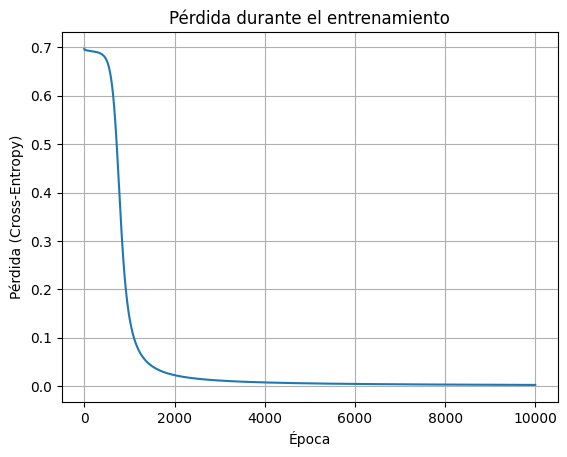

In [12]:

# Inicializar parámetros
w1, b1, w2, b2 = init_parameters(n_input=2, n_hidden=5, n_output=1)

# Entrenar
w1, b1, w2, b2, losses = fit(X_train, y_train, w1, b1, w2, b2, learning_rate=0.1, epochs=10000)

# Graficar pérdida
plt.plot(losses)
plt.title("Pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida (Cross-Entropy)")
plt.grid(True)
plt.show()

In [14]:
#errors, params = fit(X, y, iterations=5000, eta = 0.1)

In [15]:
#y_pred = predict(X, params["W1"], params["W2"], params["b1"], params["b2"])
#num_correct_predictions = (y_pred == y).sum()
#accuracy = (num_correct_predictions / y.shape[0]) * 100
#print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)

In [16]:
#alt.data_transformers.disable_max_rows()
#df = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})
#alt.Chart(df).mark_line().encode(x="time-step", y="errors").properties(title='Chart 2')

# Mismo Dataset en Framework Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import altair as alt

In [2]:
# Inputs: XOR problem
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T  # Shape (4, 2)
y = np.array([[0, 1, 1, 0]]).T  # Shape (4, 1)

# Convert to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNet()

# Loss and optimizer
#criterion = nn.MSELoss() #el anterior
criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters())

# Training loop
errors = []
epochs = 3000

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())

# Convert errors to DataFrame and plot
df2 = pd.DataFrame({"errors": errors, "time-step": np.arange(epochs)})

alt.Chart(df2).mark_line().encode(
    x="time-step",
    y="errors"
).properties(title='Chart 3')

alt.Chart(...)

1. ¿Existen cambios de arquitectura en las 2 redes implementadas?
No hay cambios en la arquitectura como tal. Las dos redes tienen la misma estructura: una capa de entrada, una oculta con activación sigmoide y una capa de salida también con sigmoide. La diferencia principal está en cómo se programaron: una está hecha "a mano" usando NumPy, y la otra se implementó con PyTorch. Pero en cuanto a la cantidad de capas y neuronas, son iguales.

2. ¿Existen diferencias en la velocidad de convergencia entre las 2 redes?
Sí, hay diferencia. La red que hicimos con PyTorch entrena más rápido porque usa el optimizador Adam, que ajusta el aprendizaje automáticamente. Además, PyTorch ya está optimizado por dentro, entonces las operaciones se hacen más rápido que en la implementación con NumPy, que es más básica.

3. En la función init_parameters, ¿qué sucede si inicializamos los pesos en 0 en lugar de valores aleatorios? ¿Y los bias?
Si se inicializan los pesos en cero, la red no va a aprender bien. Esto pasa porque todas las neuronas van a hacer lo mismo y van a recibir el mismo ajuste durante el entrenamiento, entonces no se rompe la simetría y no hay aprendizaje real. En cambio, los bias sí se pueden poner en cero sin problema, porque no afectan esa parte de la simetría, y eso es algo que se hace seguido en la práctica.